## Lending Club Case Study ##

### Business Objective ###

Lending Club is the largest online loan marketplace, facilitating personal loans, business loans, and financing of medical procedures. Borrowers can easily access lower interest rate loans through a fast online interface. 

 

Like most other lending companies, lending loans to ‘risky’ applicants is the largest source of financial loss (called credit loss). The credit loss is the amount of money lost by the lender when the borrower refuses to pay or runs away with the money owed. In other words, borrowers who default cause the largest amount of loss to the lenders. In this case, the customers labelled as 'charged-off' are the 'defaulters'. 

The **Objective** of this study is to understand the driving factors (or driver variables) behind loan default, i.e. the variables which are strong indicators of default.  The company can utilise this knowledge for its portfolio and risk assessment.

### Approach ###

We will follow a four Step Approach for this Analysis 

1. Data Exploration 
2. Data Cleansing
3. Data Analysis
   - Univariate Analysis
   - Bivariate Analysis
4. Analysis Recommendations

## 1. Data Exploration ##

1. We will first load the Data into Data Frames

In [1]:
import pandas as pd 

loan_df = pd.read_csv('loan.csv')
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

/Users/r0r00i9/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (47) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


2. And have a high level Over View of the Data

In [2]:
loan_df.shape

(39717, 111)

In [3]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


In [4]:
loan_df.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,3.971700e+04,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,14035.000000,2786.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39661.0,0.0,39717.0,0.0,0.0,0.0,39717.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39661.0,39717.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39020.000000,39678.0,0.0,0.0,0.0,0.0
mean,6.831319e+05,8.504636e+05,11219.443815,10947.713196,10397.448868,324.561922,6.896893e+04,13.315130,0.146512,0.869200,35.900962,69.698134,9.294408,0.055065,13382.528086,22.088828,51.227887,50.989768,12153.596544,11567.149118,9793.348813,2263.663172,1.363015,95.221624,12.406112,2678.826162,0.0,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.043260,0.0,NaN,NaN,NaN,NaN
std,2.106941e+05,2.656783e+05,7456.670694,7187.238670,7128.450439,208.874874,6.379377e+04,6.678594,0.491812,1.070219,22.020060,43.822529,4.400282,0.237200,15885.016641,11.401709,375.172839,373.824457,9042.040766,8942.672613,7065.522127,2608.111964,7.289979,688.744771,148.671593,4447.136012,0.0,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.204324,0.0,NaN,NaN,NaN,NaN
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
25%,5.162210e+05,6.667800e+05,5500.000000,5400.000000,5000.000000,167.020000,4.040400e+04,8.170000,0.000000,0.000000,18.000000,22.000000,6.000000,0.000000,3703.000000,13.000000,0.000000,0.000000,5576.930000,5112.310000,4600.000000,662.180000,0.000000,0.000000,0.000000,218.680000,0.0,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

In [5]:
#loan_df = loan_df.drop(['desc','url'], axis=1)
loan_df =loan_df.reindex(sorted(loan_df.columns), axis=1)
loan_df.head()

,acc_now_delinq,acc_open_past_24mths,addr_state,all_util,annual_inc,annual_inc_joint,application_type,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,collection_recovery_fee,collections_12_mths_ex_med,delinq_2yrs,delinq_amnt,desc,dti,dti_joint,earliest_cr_line,emp_length,emp_title,funded_amnt,funded_amnt_inv,grade,home_ownership,id,il_util,initial_list_status,inq_fi,inq_last_12m,inq_last_6mths,installment,int_rate,issue_d,last_credit_pull_d,last_pymnt_amnt,last_pymnt_d,loan_amnt,loan_status,max_bal_bc,member_id,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_last_delinq,mths_since_last_major_derog,mths_since_last_record,mths_since_rcnt_il,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,next_pymnt_d,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,open_acc,open_acc_6m,open_il_12m,open_il_24m,open_il_6m,open_rv_12m,open_rv_24m,out_prncp,out_prncp_inv,pct_tl_nvr_dlq,percent_bc_gt_75,policy_code,pub_rec,pub_rec_bankruptcies,purpose,pymnt_plan,recoveries,revol_bal,revol_util,sub_grade,tax_liens,term,title,tot_coll_amt,tot_cur_bal,tot_hi_cred_lim,total_acc,total_bal_ex_mort,total_bal_il,total_bc_limit,total_cu_tl,total_il_high_credit_limit,total_pymnt,total_pymnt_inv,total_rec_int,total_rec_late_fee,total_rec_prncp,total_rev_hi_lim,url,verification_status,verification_status_joint,zip_code
0,0,NaN,AZ,NaN,24000.0,NaN,INDIVIDUAL,NaN,NaN,NaN,0.0,0.00,0.0,0,0,Borrower added on 12/22/11 > I need to upgrade my business technologies.<br>,27.65,NaN,Jan-85,10+ years,NaN,5000,4975.0,B,RENT,1077501,NaN,f,NaN,NaN,1,162.87,10.65%,Dec-11,May-16,171.62,Jan-15,5000,Fully Paid,NaN,1296599,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,NaN,NaN,1,0,0.0,credit_card,n,0.00,13648,83.70%,B2,0.0,36 months,Computer,NaN,NaN,NaN,9,NaN,NaN,NaN,NaN,NaN,5863.155187,5833.84,863.16,0.00,5000.00,NaN,https://lendingclub.com/browse/loanDetail.action?loan_id=1077501,Verified,NaN,860xx
1,0,NaN,GA,NaN,30000.0,NaN,INDIVIDUAL,NaN,NaN,NaN,0.0,1.11,0.0,0,0,Borrower added on 12/22/11 > I plan to use this money to finance the motorcycle i am looking at. I plan to have it paid off as soon as possible/when i sell my old bike. I only need this money because the deal im looking at is to good to pass up.<br><br> Borrower added on 12/22/11 > I plan to use this money to finance the motorcycle i am looking at. I plan to have it paid off as soon as possible/when i sell my old bike.I only need this money because the deal im looking at is to good to pass up. I have finished college with an associates degree in business and its takingmeplaces<br>,1.00,NaN,Apr-99,< 1 year,Ryder,2500,2500.0,C,RENT,1077430,NaN,f,NaN,NaN,5,59.83,15.27%,Dec-11,Sep-13,119.66,Apr-13,2500,Charged Off,NaN,1314167,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,NaN,NaN,1,0,0.0,car,n,117.08,1687,9.40%,C4,0.0,60 months,bike,NaN,NaN,NaN,4,NaN,NaN,NaN,NaN,NaN,1008.710000,1008.71,435.17,0.00,456.46,NaN,https://lendingclub.com/browse/loanDetail.action?loan_id=1077430,Source Verified,NaN,309xx
2,0,NaN,IL,NaN,12252.0,NaN,INDIVIDUAL,NaN,NaN,NaN,0.0,0.00,0.0,0,0,NaN,8.72,NaN,Nov-01,10+ years,NaN,2400,2400.0,C,RENT,1077175,NaN,f,NaN,NaN,2,84.33,15.96%,Dec-11,May-16,649.91,Jun-14,2400,Fully Paid,NaN,1313524,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,NaN,NaN,1,0,0.0,small_business,n,0.00,2956,98.50%,C5,0.0,36 months,real estate business,NaN,NaN,NaN,10,NaN,NaN,NaN,NaN,NaN,3005.666844,3005.67,605.67,0.00,2400.00,NaN,https://lendingclub.com/browse/loanDetail.act

## 2. Data Cleansing ##

In [6]:
100*round(loan_df.isnull().sum()/len(loan_df.index),2)

acc_now_delinq                      0.0
acc_open_past_24mths              100.0
addr_state                          0.0
all_util                          100.0
annual_inc                          0.0
annual_inc_joint                  100.0
application_type                    0.0
avg_cur_bal                       100.0
bc_open_to_buy                    100.0
bc_util                           100.0
chargeoff_within_12_mths            0.0
collection_recovery_fee             0.0
collections_12_mths_ex_med          0.0
delinq_2yrs                         0.0
delinq_amnt                         0.0
desc                               33.0
dti                                 0.0
dti_joint                         100.0
earliest_cr_line                    0.0
emp_length                          3.0
emp_title                           6.0
funded_amnt                         0.0
funded_amnt_inv                     0.0
grade                               0.0
home_ownership                      0.0


There are considerable number of columns which have No Values at all. We will drop them from the analysis

In [7]:
loan_df = loan_df.dropna(axis=1, how='all', thresh=717)

In [8]:
loan_df.shape

(39717, 57)

We are now left with only **57**  columns from the original 111. Lets analyse this further

In [9]:
100*round(loan_df.isnull().sum()/len(loan_df.index),2)

acc_now_delinq                 0.0
addr_state                     0.0
annual_inc                     0.0
application_type               0.0
chargeoff_within_12_mths       0.0
collection_recovery_fee        0.0
collections_12_mths_ex_med     0.0
delinq_2yrs                    0.0
delinq_amnt                    0.0
desc                          33.0
dti                            0.0
earliest_cr_line               0.0
emp_length                     3.0
emp_title                      6.0
funded_amnt                    0.0
funded_amnt_inv                0.0
grade                          0.0
home_ownership                 0.0
id                             0.0
initial_list_status            0.0
inq_last_6mths                 0.0
installment                    0.0
int_rate                       0.0
issue_d                        0.0
last_credit_pull_d             0.0
last_pymnt_amnt                0.0
last_pymnt_d                   0.0
loan_amnt                      0.0
loan_status         

We can also drop **mths_since_last_record** and **next_pymnt_d** as they have above 90% empty records

In [10]:
loan_df.drop(['next_pymnt_d','mths_since_last_record'], axis=1, inplace=True)

We can also drop the **description** field as its free form text and the **Url** as its not relevant to the analysis

In [11]:
loan_df = loan_df.drop(['desc','url'], axis=1)

In [12]:
loan_df.shape

(39717, 53)

We have now reduced to around **53** Columns. Lets understand more about the data

In [13]:
loan_df.head()

,acc_now_delinq,addr_state,annual_inc,application_type,chargeoff_within_12_mths,collection_recovery_fee,collections_12_mths_ex_med,delinq_2yrs,delinq_amnt,dti,earliest_cr_line,emp_length,emp_title,funded_amnt,funded_amnt_inv,grade,home_ownership,id,initial_list_status,inq_last_6mths,installment,int_rate,issue_d,last_credit_pull_d,last_pymnt_amnt,last_pymnt_d,loan_amnt,loan_status,member_id,mths_since_last_delinq,open_acc,out_prncp,out_prncp_inv,policy_code,pub_rec,pub_rec_bankruptcies,purpose,pymnt_plan,recoveries,revol_bal,revol_util,sub_grade,tax_liens,term,title,total_acc,total_pymnt,total_pymnt_inv,total_rec_int,total_rec_late_fee,total_rec_prncp,verification_status,zip_code
0,0,AZ,24000.0,INDIVIDUAL,0.0,0.00,0.0,0,0,27.65,Jan-85,10+ years,NaN,5000,4975.0,B,RENT,1077501,f,1,162.87,10.65%,Dec-11,May-16,171.62,Jan-15,5000,Fully Paid,1296599,NaN,3,0.00,0.00,1,0,0.0,credit_card,n,0.00,13648,83.70%,B2,0.0,36 months,Computer,9,5863.155187,5833.84,863.16,0.00,5000.00,Verified,860xx
1,0,GA,30000.0,INDIVIDUAL,0.0,1.11,0.0,0,0,1.00,Apr-99,< 1 year,Ryder,2500,2500.0,C,RENT,1077430,f,5,59.83,15.27%,Dec-11,Sep-13,119.66,Apr-13,2500,Charged Off,1314167,NaN,3,0.00,0.00,1,0,0.0,car,n,117.08,1687,9.40%,C4,0.0,60 months,bike,4,1008.710000,1008.71,435.17,0.00,456.46,Source Verified,309xx
2,0,IL,12252.0,INDIVIDUAL,0.0,0.00,0.0,0,0,8.72,Nov-01,10+ years,NaN,2400,2400.0,C,RENT,1077175,f,2,84.33,15.96%,Dec-11,May-16,649.91,Jun-14,2400,Fully Paid,1313524,NaN,2,0.00,0.00,1,0,0.0,small_business,n,0.00,2956,98.50%,C5,0.0,36 months,real estate business,10,3005.666844,3005.67,605.67,0.00,2400.00,Not Verified,606xx
3,0,CA,49200.0,INDIVIDUAL,0.0,0.00,0.0,0,0,20.00,Feb-96,10+ years,AIR RESOURCES BOARD,10000,10000.0,C,RENT,1076863,f,1,339.31,13.49%,Dec-11,Apr-16,357.48,Jan-15,10000,Fully Paid,1277178,35.0,10,0.00,0.00,1,0,0.0,other,n,0.00,5598,21%,C1,0.0,36 months,personel,37,12231.890000,12231.89,2214.92,16.97,10000.00,Source Verified,917xx
4,0,OR,80000.0,INDIVIDUAL,0.0,0.00,0.0,0,0,17.94,Jan-96,1 year,University Medical Group,3000,3000.0,B,RENT,1075358,f,0,67.79,12.69%,Dec-11,May-16,67.79,May-16,3000,Current,1311748,38.0,15,524.06,524.06,1,0,0.0,other,n,0.00,27783,53.90%,B5,0.0,60 months,Personal,38,3513.330000,3513.33,1037.39,0.00,2475.94,Source Verified,972xx


In [14]:
loan_df.describe()

,acc_now_delinq,annual_inc,chargeoff_within_12_mths,collection_recovery_fee,collections_12_mths_ex_med,delinq_2yrs,delinq_amnt,dti,funded_amnt,funded_amnt_inv,id,inq_last_6mths,installment,last_pymnt_amnt,loan_amnt,member_id,mths_since_last_delinq,open_acc,out_prncp,out_prncp_inv,policy_code,pub_rec,pub_rec_bankruptcies,recoveries,revol_bal,tax_liens,total_acc,total_pymnt,total_pymnt_inv,total_rec_int,total_rec_late_fee,total_rec_prncp
count,39717.0,3.971700e+04,39661.0,39717.000000,39661.0,39717.000000,39717.0,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,14035.000000,39717.000000,39717.000000,39717.000000,39717.0,39717.000000,39020.000000,39717.000000,39717.000000,39678.0,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000
mean,0.0,6.896893e+04,0.0,12.406112,0.0,0.146512,0.0,13.315130,10947.713196,10397.448868,6.831319e+05,0.869200,324.561922,2678.826162,11219.443815,8.504636e+05,35.900962,9.294408,51.227887,50.989768,1.0,0.055065,0.043260,95.221624,13382.528086,0.0,22.088828,12153.596544,11567.149118,2263.663172,1.363015,9793.348813
std,0.0,6.379377e+04,0.0,148.671593,0.0,0.491812,0.0,6.678594,7187.238670,7128.450439,2.106941e+05,1.070219,208.874874,4447.136012,7456.670694,2.656783e+05,22.020060,4.400282,375.172839,373.824457,0.0,0.237200,0.204324,688.744771,15885.016641,0.0,11.401709,9042.040766,8942.672613,2608.111964,7.289979,7065.522127
min,0.0,4.000000e+03,0.0,0.000000,0.0,0.000000,0.0,0.000000,500.000000,0.000000,5.473400e+04,0.000000,15.690000,0.000000,500.000000,7.069900e+04,0.000000,2.000000,0.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.0,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.0,4.040400e+04,0.0,0.000000,0.0,0.000000,0.0,8.170000,5400.000000,5000.000000,5.162210e+05,0.000000,167.020000,218.680000,5500.000000,6.667800e+05,18.000000,6.000000,0.000000,0.000000,1.0,0.000000,0.000000,0.000000,3703.000000,0.0,13.000000,5576.930000,5112.310000,662.180000,0.000000,4600.000000
50%,0.0,5.900000e+04,0.0,0.000000,0.0,0.000000,0.0,13.400000,9600.000000,8975.000000,6.656650e+05,1.000000,280.220000,546.140000,10000.000000,8.508120e+05,34.000000,9.000000,0.000000,0.000000,1.0,0.000000,0.000000,0.000000,8850.000000,0.0,20.000000,9899.640319,9287.150000,1348.910000,0.000000,8000.000000
75%,0.0,8.230000e+04,0.0,0.000000,0.0,0.000000,0.0,18.600000,15000.000000,14400.000000,8.377550e+05,1.000000,430.780000,3293.160000,15000.000000,1.047339e+06,52.000000,12.000000,0.000000,0.000000,1.0,0.000000,0.000000,0.000000,17058.000000,0.0,29.000000,16534.433040,15798.810000,2833.400000,0.000000,13653.260000
max,0.0,6.000000e+06,0.0,7002.190000,0.0,11.000000,0.0,29.990000,35000.000000,35000.000000,1.077501e+06,8.000000,1305.190000,36115.200000,35000.000000,1.314167e+06,120.000000,44.000000,6311.470000,6307.370000,1.0,4.000000,2.000000,29623.350000,149588.000000,0.0,90.000000,58563.679930,58563.680000,23563.680000,180.200000,35000.020000


Lets now look at fields which have high/low variability. In such cases we may not be able to derive any meaningful insights from the data.

In [15]:
loan_df.nunique().sort_values()

acc_now_delinq                    1
pymnt_plan                        1
policy_code                       1
delinq_amnt                       1
collections_12_mths_ex_med        1
tax_liens                         1
chargeoff_within_12_mths          1
application_type                  1
initial_list_status               1
term                              2
pub_rec_bankruptcies              3
verification_status               3
loan_status                       3
pub_rec                           5
home_ownership                    5
grade                             7
inq_last_6mths                    9
delinq_2yrs                      11
emp_length                       11
purpose                          14
sub_grade                        35
open_acc                         40
addr_state                       50
issue_d                          55
total_acc                        82
mths_since_last_delinq           95
last_pymnt_d                    101
last_credit_pull_d          

In [16]:
loan_df.pymnt_plan.values

array(['n', 'n', 'n', ..., 'n', 'n', 'n'], dtype=object)

In [17]:
loan_df.zip_code.value_counts()

100xx    597
945xx    545
112xx    516
606xx    503
070xx    473
900xx    453
021xx    397
300xx    394
926xx    371
750xx    367
941xx    356
331xx    349
917xx    348
921xx    346
770xx    321
117xx    303
113xx    284
852xx    279
913xx    278
330xx    255
891xx    255
080xx    244
925xx    237
902xx    235
334xx    234
201xx    229
920xx    228
980xx    224
951xx    223
303xx    220
200xx    214
928xx    209
104xx    208
923xx    204
802xx    199
301xx    199
940xx    199
950xx    195
212xx    191
191xx    187
554xx    187
088xx    187
773xx    186
956xx    186
600xx    186
787xx    186
207xx    179
604xx    179
850xx    178
752xx    174
601xx    174
981xx    171
328xx    171
333xx    164
853xx    163
190xx    158
060xx    154
208xx    153
958xx    150
064xx    150
774xx    147
481xx    146
327xx    145
028xx    141
210xx    140
114xx    138
432xx    137
760xx    137
018xx    134
890xx    133
336xx    133
972xx    132
152xx    132
800xx    129
335xx    128
322xx    127
782xx    127

In [18]:
loan_df.acc_now_delinq.value_counts()

0    39717
Name: acc_now_delinq, dtype: int64

In [19]:
loan_df.initial_list_status.value_counts()

f    39717
Name: initial_list_status, dtype: int64

Based on Data Dictionary we did some Data Analysis of the above columns reveals below insights:

| Field Name      | Description | 
| :---        |    :----:   |          
| id          |         ID Field may not useful for the analysis   | 
| member_id   |  ID Field may not be useful for Analysis |
|funded_amnt  | Value is very close to loan amount. Loan Amt can be used for analysis | 
|funded_amt_inv | Value is very close to loan amount. Loan Amt can be used for analysis |
| pymnt_plan | Payment Plan has only one value 'n' and so can be dropped |
| zip_code   | Zip Code has only First 3 Digits and may not be usefule of further analysis |
|initial_list_status | Has only one Value 'F' which is not useful for analysis |
|policy_code | This is the type of policy which is either publicly available or not, not useful for analysis |
|application_type | Whether its individual or joint, has only one value so no insights can be derived |
|acc_now_delinq | Has a constant value of 0, so no meaningful insights can be derived |
|delinq_amnt | Past due amount which has only one value, so no meaninful insights can be derived |

Based on the above reasons the we are planning to drop all the above columns

In [20]:
columns_tobe_dropped = ['id','member_id','funded_amnt','funded_amnt_inv','pymnt_plan','zip_code','initial_list_status','policy_code','application_type','acc_now_delinq','delinq_amnt',]
loan_df= loan_df.drop(columns_tobe_dropped,axis=1) 

In [21]:
loan_df.shape

(39717, 42)

We are now left with **42** columns from the initial set of **111**. This is a good point to start the analysis

## Data Preparation  ##

- Let us first determine our **Target Variable**. 

This will also help us purge out any unwanted Rows. 
Based on the Data Dictionary the target Variable we have chosen is **Loan Status**

In [22]:
loan_df.loan_status.value_counts()

Fully Paid     32950
Charged Off     5627
Current         1140
Name: loan_status, dtype: int64

We can remove all the Loans which are current as they are not useful for our analysis

In [23]:
#Drop Current loans from the analysis as that is not relevant
loan_df = loan_df[loan_df.loan_status != 'Current']

In [24]:
loan_df.shape

(38577, 42)

Lets convert the Target Variable to a Number which will enable us to create **Categorical** Charts

In [25]:
# converting type of columns to 'category'
loan_df['loan_status'] = loan_df['loan_status'].astype('category')
#fully paid = 0 , charged_off = 1
loan_df['loan_status'].replace(to_replace=['Fully Paid', 'Charged Off'], value=[1, 0], inplace=True)


<AxesSubplot:>

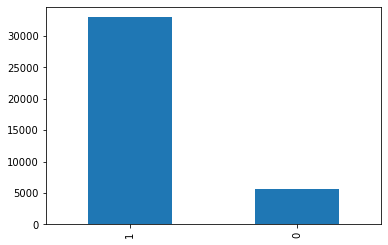

In [27]:
import  seaborn as sns
loan_df.loan_status.value_counts().plot.bar()

**Observation**  : 
We now have a cleaner and shorter data set with which we can do our analysis
We also defined our  **Target Variable **  ie **Loan Status**, against which we will do our Analysis
Let us create a temporary checkpoint to store our results

In [28]:
loan_df.to_csv("cleaned.csv", index=False)

## 4. Data Analysis ##

#### Purpose ####

### 4.1 Univariate Analysis ###

**Purpose**

### 4.2 Bivariate Analysis ###

**Purpose**

## 5. Summary Recommendation/Plots ##